In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
train = pd.read_csv('titanic_train.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

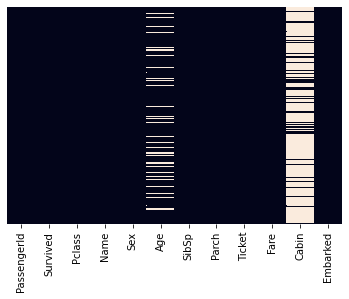

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [9]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

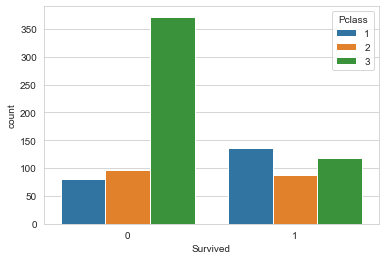

In [10]:
sns.countplot(x='Survived', data=train, hue='Pclass')

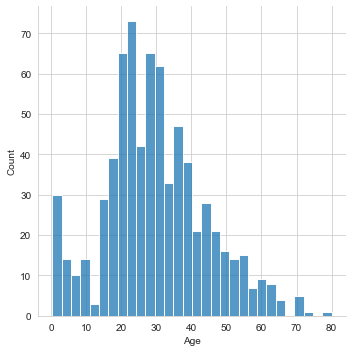

In [11]:
sns.displot(train['Age'].dropna(), bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

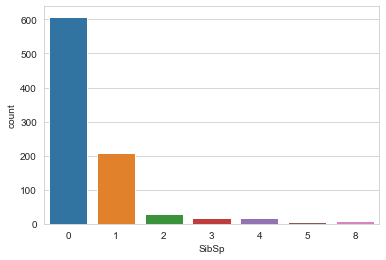

In [13]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

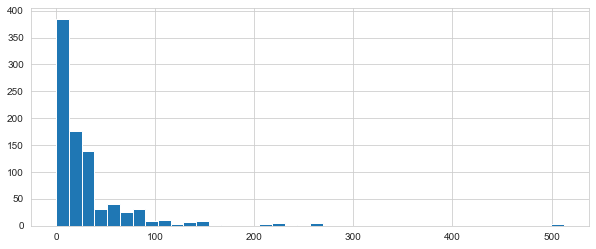

In [14]:
train['Fare'].hist(bins=40, figsize=(10, 4))

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist', bins=40)

In [27]:
#by imputation set the unkown age values to the average value of all the ages


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train[['Pclass','Age']].pivot(columns='Pclass', values='Age').iplot(kind='box')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

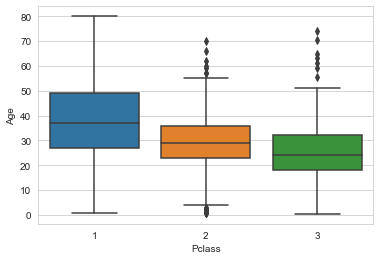

In [20]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else: 
        return Age

In [22]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

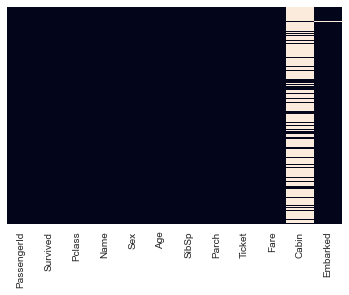

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [24]:
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.dropna(inplace=True)

In [26]:
#step 1 of cleaning data is filling missing values

In [27]:
#step 2: converting categorical features to dummy variables using pandas

In [28]:
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [29]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [30]:
train=pd.concat([train, sex, embark], axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [32]:
train.drop(['Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [33]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [90]:
#Pclass is a categorical column too and a dummy variable can be used to substitute its actual value

In [120]:
X=train.drop('Survived', axis=1)
y=train['Survived']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodel = LogisticRegression( max_iter=10000, solver='liblinear')

In [125]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [126]:
predictions = logmodel.predict(X_test)

In [127]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [109]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


In [114]:
Class = pd.get_dummies(train['Pclass'], drop_first=True)

In [117]:
Class

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [115]:
train = pd.concat([train, Class], axis=1)

In [116]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1


In [118]:
train.drop('Pclass', axis=1, inplace=True)

In [119]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,1,0,1,0,1
